In [69]:
import pandas as pd
import os

MODEL_PATH = '/opt/ml/level-3-final-project/Model/model'
DATA_PATH = '/opt/ml/level-3-final-project/Data'

In [70]:
if not os.path.isdir(MODEL_PATH):
    os.mkdir(MODEL_PATH)

In [77]:
user_meta = pd.read_csv('user_data.csv')

score_meta = pd.read_csv('score_data.csv')
score_meta = score_meta[score_meta['answer'] == '맞았습니다!!']
score_meta['Problem_problemId'] = score_meta['Problem_problemId'].astype(int)
score_meta = score_meta.reset_index(drop = True)

problem_meta = pd.read_csv('problem-meta-data.csv')

In [78]:
user_meta

,handle,organizations,solvedCount,voteCount,class,tier,rating,ratingByProblemsSum,ratingByClass,ratingBySolvedCount,ratingByVoteCount,exp,rivalCount,reverseRivalCount,maxStreak,rank
0,MenOfPassion,"[{'organizationId': 394, 'name': 'KAIST', 'typ...",2934,5,9,25,2672,2247,240,175,10,645509911,0,14,8,101
1,soloplay,[],661,157,8,25,2672,2248,230,169,25,697532977,22,28,24,101
2,klimmek55,"[{'organizationId': 214, 'name': '고려대학교', 'typ...",3575,54,8,25,2667,2237,230,175,25,663290245,7,7,124,103
3,lobo_prix,"[{'organizationId': 323, 'name': '숭실대학교', 'typ...",2244,263,8,25,2665,2235,230,175,25,645821440,17,11,11,104
4,himyu,"[{'organizationId': 561, 'name': '서울과학고등학교', '...",639,119,9,25,2662,2229,240,168,25,422586231,22,24,6,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,abra_stone,"[{'organizationId': 546, 'name': '이현중학교', 'typ...",1103,39,6,24,2523,2114,210,174,25,273526321,1,7,16,196
96,andrewmjk1,"[{'organizationId': 425, 'name': '한양대학교', 'typ...",783,100,8,24,2522,2095,230,172,25,270864073,19,10,71,197
97,gratus907,"[{'organizationId': 299, 'name': '서울대학교', 'typ...",1454,174,7,24,2520,2100,220,175,25,320931633,8,11,4,198
98,runnie0427,"[{'organizationId': 394, 'name': 'KAIST', 'typ...",1684,102,7,24,2520,2100,220,175,25,307974179,16,14,172,198


In [79]:
score_meta[score_meta['User_userId'] == 'MenOfPassion']

,scoreId,User_userId,Problem_problemId,answer,memory,time,language,length,date
0,42965464,MenOfPassion,13926,맞았습니다!!,117212.0,152.0,PyPy3,1850.0,1651919709
1,42964671,MenOfPassion,10854,맞았습니다!!,117212.0,168.0,PyPy3,1481.0,1651918391
2,42961389,MenOfPassion,5615,맞았습니다!!,118032.0,2552.0,PyPy3,874.0,1651913224
3,42961179,MenOfPassion,5615,맞았습니다!!,116548.0,668.0,PyPy3,817.0,1651912904
4,42955720,MenOfPassion,2160,맞았습니다!!,115256.0,124.0,PyPy3,395.0,1651904945
...,...,...,...,...,...,...,...,...,...
786,25372254,MenOfPassion,2461,맞았습니다!!,14432.0,196.0,C++17,2003.0,1610883874
787,25371950,MenOfPassion,2461,맞았습니다!!,14432.0,200.0,C++17,1424.0,1610883379
788,25368502,MenOfPassion,2459,맞았습니다!!,3752.0,32.0,C++17,2202.0,1610877313
789,25366912,MenOfPassion,2458,맞았습니다!!,3336.0,48.0,C++17,1237.0,1610874395


In [75]:
problem_meta

,title,problem_info,problem_description,problem_input,problem_output,problem_hint,problem_limit,sample_list,problem_association,problem_tags,problem_num
0,1000번: A+B,"['2 초 ', '128 MB', '593356', '247193', '176987...","\n두 정수 A와 B를 입력받은 다음, A+B를 출력하는 프로그램을 작성하시오.\n","\n첫째 줄에 A와 B가 주어진다. (0 < A, B < 10)\n",\n첫째 줄에 A+B를 출력한다.\n,\n여기를 누르면 1000번 예제 소스를 볼 수 있습니다.\n,\n,"[['1 2\n', '3\n']]","['1001번. A-B', '1008번. A/B', '2558번. A+B - 2',...",[],1000
1,1001번: A-B,"['2 초 ', '128 MB', '247010', '172725', '148343...","\n두 정수 A와 B를 입력받은 다음, A-B를 출력하는 프로그램을 작성하시오.\n","\n첫째 줄에 A와 B가 주어진다. (0 < A, B < 10)\n",\n첫째 줄에 A-B를 출력한다.\n,\n,\n,"[['3 2\n', '1']]","['1000번. A+B', '1008번. A/B', '2558번. A+B - 2',...",[],1001
2,1002번: 터렛,"['2 초 ', '128 MB', '155147', '32698', '26037',...",\n조규현과 백승환은 터렛에 근무하는 직원이다. 하지만 워낙 존재감이 없어서 인구수...,\n첫째 줄에 테스트 케이스의 개수 T가 주어진다. 각 테스트 케이스는 다음과 같이...,\n각 테스트 케이스마다 류재명이 있을 수 있는 위치의 수를 출력한다. 만약 류재명...,\n,\n,[['3\n0 0 13 40 0 37\n0 0 3 0 7 4\n1 1 1 1 1 5...,[],[],1002
3,1003번: 피보나치 함수,"['0.25 초 (추가 시간 없음) ', '128 MB', '157077', '44...",\n다음 소스는 N번째 피보나치 수를 구하는 C++ 함수이다.\nint fibona...,\n첫째 줄에 테스트 케이스의 개수 T가 주어진다.\n각 테스트 케이스는 한 줄로 ...,\n각 테스트 케이스마다 0이 출력되는 횟수와 1이 출력되는 횟수를 공백으로 구분해...,\n,\n,"[['3\n0\n1\n3\n', '1 0\n0 1\n1 2\n'], ['2\n6\n...",[],[],1003
4,1004번: 어린 왕자,"['2 초 ', '128 MB', '25107', '10345', '8522', '...",\n어린 왕자는 소혹성 B-664에서 자신이 사랑하는 한 송이 장미를 위해 살아간다...,\n입력의 첫 줄에는 테스트 케이스의 개수 T가 주어진다. 그 다음 줄부터 각각의 ...,\n각 테스트 케이스에 대해 어린 왕자가 거쳐야 할 최소의 행성계 진입/이탈 횟수를...,\n,"\n\n-1000 ≤ x1, y1, x2, y2, cx, cy ≤ 1000\n1 ≤...",[['2\n-5 1 12 1\n7\n1 1 8\n-3 -1 1\n2 2 2\n5 5...,[],[],1004
...,...,...,...,...,...,...,...,...,...,...,...
18027,19996번: Загранпаспорт,"['2 초 ', '512 MB', '0', '0', '0', '0.000%']","\nОсень 2243-го года. Государства в прошлом, г...",\nВ первой строке входного файла содержатся тр...,\nВ выходной файл выведите одну строку из симв...,\n,\n,"[['5 3 6\nAAATA\nVAATA\nAAAAT\n', 'EEENSNSN\n'...",[],[],19996
18028,19997번: Вирус,"['2 초 ', '512 MB', '0', '0', '0', '0.000%']",\nВ лаборатории биоинформатики ученые проводят...,\nВ первой строке входного файла находятся цел...,\nВыведите количество различных возможных конф...,\n,\n,"[['2 2 1\n*.\n..\n', '2\n'], ['2 2 2\n*.\n..\n...",[],[],19997
18029,19998번: 스도쿠 (Hard),"['0.1 초 ', '512 MB', '552', '72', '29', '26.12...",\n스도쿠는 18세기 스위스 수학자가 만든 '라틴 사각형'이랑 퍼즐에서 유래한 것으...,\n아홉 줄에 걸쳐 한 줄에 9개씩 게임 시작 전 스도쿠판 각 줄에 쓰여 있는 숫자...,\n모든 빈 칸이 채워진 스도쿠 판의 최종 모습을 아홉 줄에 걸쳐 한 줄에 9개씩 ...,\n,\n,[['0 3 5 4 6 9 2 7 8\n7 8 2 1 0 5 6 0 9\n0 6 0...,[],[],19998
18030,19999번: 일하는 구구,"['0.25 초 (추가 시간 없음) ', '512 MB', '4329', '96',...",\n\n,\n\n,\n\n,\n\n\n,\n\n,"[['2\n', '4000 4000\n']]",[],[],19999


In [4]:
Problem_list = score_meta['Problem_problemId'].unique().tolist()
problem_meta_list = problem_meta['problem_num'].unique().tolist()

In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.callbacks import CallbackAny2Vec
import datetime

class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 1
        self.loss_to_be_subed = 0
        self.loss_now = 987654321

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed

        self.loss_to_be_subed = loss
        if loss_now < self.loss_now:
            self.loss_now = loss_now
            model.save(os.path.join(MODEL_PATH, 'Word2Vec_Embedding_Model_window_50.model'))
            print(f'Loss after epoch {self.epoch}: {loss_now}, Total_loss : {loss}')
            print('Model 저장')
        self.epoch += 1

start = datetime.datetime.now()

group_df = score_meta.groupby('User_userId')
sentences = []
for user, g in group_df:
    item_list = g['Problem_problemId'].tolist()
    sentences.append(
        item_list
    )

model = Word2Vec(
                sentences = sentences,
                seed = 22,
                epochs = 100,
                min_count = 1,
                vector_size = 32,
                sg = 1,
                negative = 5,
                window = 20,
                compute_loss = True, 
                callbacks=[callback()],
                 )

print("Time passed: " + str(datetime.datetime.now() - start))

In [7]:
from gensim.models import Word2Vec

model = Word2Vec.load(os.path.join(MODEL_PATH, 'Word2Vec_Embedding_Model_window_50.model'))

In [10]:
import numpy as np

Problem_list = model.wv.key_to_index.keys()

arr = []

for Problem in Problem_list:
    arr.append(model.wv[Problem])

arr = np.array(arr)

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

item2item_list = {}

index_to_key = model.wv.index_to_key

for idx, cos_sim_list in enumerate(cosine_similarity(arr, arr)):
    item2item_list[index_to_key[idx]] = [index_to_key[item_idx] for item_idx in cos_sim_list.argsort()[::-1][:6]]

In [65]:
import json

with open("item2item_list.json", "w") as json_file:
    json.dump(item2item_list, json_file)

In [62]:
item2item_list[1000]

[13558, 17970, 21343, 21219, 20695]

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0)
new_arr = tsne.fit_transform(arr)

c:\Users\2712q\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\2712q\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


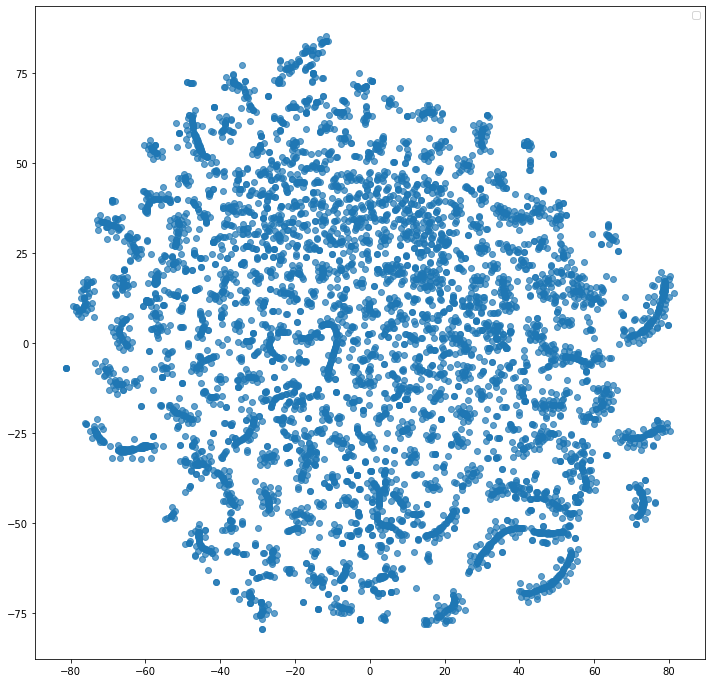

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))
plt.scatter(new_arr[:, 0], new_arr[:, 1], alpha = 0.7) 
plt.legend()
plt.show()

In [40]:
join_Problem_list = ",".join(list(map(str, list(Problem_list)[:5])))

In [67]:
import requests

url = f"https://solved.ac/api/v3/problem/lookup?problemIds={join_Problem_list}"

headers = {"Content-Type": "application/json"}

response = requests.request("GET", url, headers=headers)

print(response.text)

[{"problemId":1000,"titleKo":"A+B","titles":[{"language":"en","languageDisplayName":"en","title":"A+B","isOriginal":false},{"language":"ko","languageDisplayName":"ko","title":"A+B","isOriginal":true}],"isSolvable":true,"isPartial":false,"acceptedUserCount":177961,"level":1,"votedUserCount":17,"sprout":false,"givesNoRating":false,"isLevelLocked":true,"averageTries":2.3696,"official":true,"tags":[{"key":"arithmetic","isMeta":false,"bojTagId":121,"problemCount":590,"displayNames":[{"language":"ko","name":"사칙연산","short":"사칙연산"},{"language":"en","name":"arithmetic","short":"arithmetic"}]},{"key":"implementation","isMeta":false,"bojTagId":102,"problemCount":3493,"displayNames":[{"language":"ko","name":"구현","short":"구현"},{"language":"en","name":"implementation","short":"impl"}]},{"key":"math","isMeta":false,"bojTagId":124,"problemCount":3907,"displayNames":[{"language":"ko","name":"수학","short":"수학"},{"language":"en","name":"mathematics","short":"math"}]}]},{"problemId":2042,"titleKo":"구간 합 구하

In [68]:
response.json()

[{'problemId': 1000,
  'titleKo': 'A+B',
  'titles': [{'language': 'en',
    'languageDisplayName': 'en',
    'title': 'A+B',
    'isOriginal': False},
   {'language': 'ko',
    'languageDisplayName': 'ko',
    'title': 'A+B',
    'isOriginal': True}],
  'isSolvable': True,
  'isPartial': False,
  'acceptedUserCount': 177961,
  'level': 1,
  'votedUserCount': 17,
  'sprout': False,
  'givesNoRating': False,
  'isLevelLocked': True,
  'averageTries': 2.3696,
  'official': True,
  'tags': [{'key': 'arithmetic',
    'isMeta': False,
    'bojTagId': 121,
    'problemCount': 590,
    'displayNames': [{'language': 'ko', 'name': '사칙연산', 'short': '사칙연산'},
     {'language': 'en', 'name': 'arithmetic', 'short': 'arithmetic'}]},
   {'key': 'implementation',
    'isMeta': False,
    'bojTagId': 102,
    'problemCount': 3493,
    'displayNames': [{'language': 'ko', 'name': '구현', 'short': '구현'},
     {'language': 'en', 'name': 'implementation', 'short': 'impl'}]},
   {'key': 'math',
    'isMeta': Fa

In [66]:
join_Problem_list

'1000,10999,12865,2042,2049'

In [ ]:
for i in response.json():
    print(i)
    print()

In [15]:
cols = ['handle', 'tier', 'solvedCount', 'voteCount', 'exp', 'rank']

tier = {1 : "Bronze V",
        2	: "Bronze IV",
        3	: "Bronze III",
        4	: "Bronze II",
        5	: "Bronze I",
        6	: "Silver V",
        7	: "Silver IV",
        8	: "Silver III",
        9	: "Silver II",
        10	: "Silver I",
        11	: "Gold V",
        12	: "Gold IV",
        13	: "Gold III",
        14	: "Gold II",
        15	: "Gold I",
        16	: "Platinum V",
        17	: "Platinum IV",
        18	: "Platinum III",
        19	: "Platinum II",
        20	: "Platinum I",
        21	: "Diamond V",
        22	: "Diamond IV",
        23	: "Diamond III",
        24	: "Diamond II",
        25	: "Diamond I",
        26	: "Ruby V",
        27	: "Ruby IV",
        28	: "Ruby III",
        29	: "Ruby II",
        30	: "Ruby I",
        31	: "Master"}

user_json = {}

for df in user.iloc:
    user_json[df['handle']] = {
        'tier' : tier[df['tier']], 
        'solvedCount' : int(df['solvedCount']), 
        'voteCount' : int(df['voteCount']), 
        'exp' : int(df['exp']), 
        'rank' : int(df['rank']),
    }

In [16]:
# import json

# with open("user.json", "w") as json_file:
#     json.dump(user_json, json_file)

In [17]:
group_df = item.groupby('level')

level2problemId = {}

for level, df in group_df:
    level2problemId[level] = df.sort_values('acceptedUserCount', ascending = False)['problemId'].tolist()[:10]

In [18]:
level = {

0	:"Unrated",
1	:"Bronze V",
2	:"Bronze IV",
3	:"Bronze III",
4	:"Bronze II",
5	:"Bronze I",
6	:"Silver V",
7	:"Silver IV",
8	:"Silver III",
9	:"Silver II",
10	:"Silver I",
11	:"Gold V",
12	:"Gold IV",
13	:"Gold III",
14	:"Gold II",
15	:"Gold I",
16	:"Platinum V",
17	:"Platinum IV",
18	:"Platinum III",
19	:"Platinum II",
20	:"Platinum I",
21	:"Diamond V",
22	:"Diamond IV",
23	:"Diamond III",
24	:"Diamond II",
25	:"Diamond I",
26	:"Ruby V",
27	:"Ruby IV",
28	:"Ruby III",
29	:"Ruby II",
30	:"Ruby I",

}

problemId2data = {}

for df in item.iloc:
    problemId2data[int(df['problemId'])] = {
        'titleKo': df['titleKo'],
        'acceptedUserCount' : int(df['acceptedUserCount']),
        'level' : level[df['level']],
    }

In [19]:
import json

with open("item.json", "w") as json_file:
    json.dump(problemId2data, json_file)

with open("level.json", "w") as json_file:
    json.dump(level2problemId, json_file)

In [23]:
problemId2data[level2problemId[1][0]]

{'titleKo': 'A+B', 'acceptedUserCount': 177263, 'level': 'Bronze V'}

In [22]:
level2problemId[1][0]

1000

In [25]:
level2problemId.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [26]:
problemId2data[1237]

{'titleKo': '정ㅋ벅ㅋ', 'acceptedUserCount': 14023, 'level': 'Unrated'}